In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/siddharthjain1611/Iris_dataset/master/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
map_color = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}

In [5]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

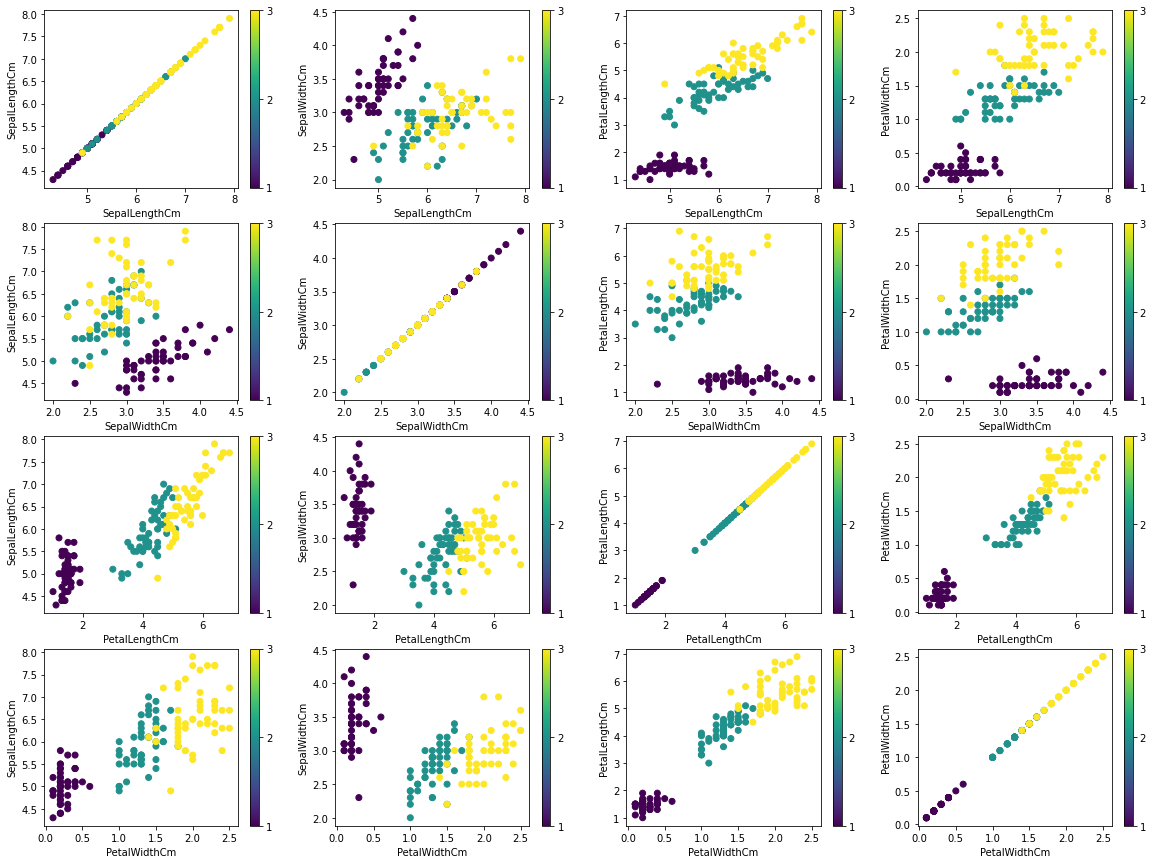

In [6]:
fig = plt.figure(figsize=(20,15))
k = 1

for i in range(len(features)):
    for j in range(len(features)):
        plt.subplot(4,4,k)
        plt.scatter(df[features[i]],df[features[j]], c=df.Species.apply(lambda x: map_color[x]))
        plt.colorbar(ticks=[1,2,3])
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        k=k+1

In [7]:
def classes(Xtreino, Xteste, Ytreino, k):
    
    classe_de_x = []
    index_todos = []

    for xteste in Xteste:
        distancias = []
        index = []
        for xtreino in Xtreino:
            distancia = np.linalg.norm(xteste - xtreino)          
            distancias.append(distancia)
        
        intervalo = [i for i in range(101)]
        dicionario = dict(zip(distancias, intervalo))
           
        dicionario = sorted(dicionario.items())
        distancias.sort()
        
        for j in range(0,k):
            index.append(dicionario[:k][j][1])
        
        index_todos.append(index)
    
    for ind in index_todos:
        classe=[]
        for valor in ind:
            classe.append(Ytreino[valor])
    
        setosas = classe.count('Iris-setosa')
        virginicas = classe.count('Iris-virginica')
        versicolors = classe.count('Iris-versicolor')
        valor_maximo = max(setosas, virginicas, versicolors)
    
        if valor_maximo == setosas:
            classe_de_x.append('Iris-setosa')
        elif valor_maximo == virginicas:
            classe_de_x.append('Iris-virginica')
        elif valor_maximo == versicolors:
            classe_de_x.append('Iris-versicolor')   
        else:
            classe_de_x.append('Iris-setosas') 
    
    return classe_de_x

In [8]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].values
y = df['Species'].values

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.333)

y_pred = classes(Xtr, Xte, ytr, 3)
print(accuracy_score(y_pred, yte))

0.96
